# Практика

In [ ]:
#Импортируем необходимые библиотеки

#Для матричных вычислений
import numpy as np
#Для анализа и предобработки данных
import pandas as pd
#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

#Метрики
from sklearn import metrics
#Методы разделения и валидации
from sklearn import model_selection
#Ансамбли
from sklearn import ensemble

#Стиль отрисовки seaborn
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [15]:
#Прочитаем таблицу с данными
shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
display(shoppers_data.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
#Посмотрим на размер таблицы
print(shoppers_data.shape)

(12330, 18)


In [17]:
#Удостоверимся в отсутствии пропусков
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [18]:
#Используя метод горячего кодирования get_dummies(), 
#закодируем категориальные признаки
dummy_data = pd.get_dummies(shoppers_data)
display(dummy_data.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


Итак, нам необходимо предсказать целевую переменную Revenue — признак покупки. Целевой признак является бинарным категориальным, то есть мы решаем задачу бинарной классификации.

Sessions without purchase: 84.53
Sessions with purchase: 15.47


C:\Users\Андрей\AppData\Local\Temp\ipykernel_17980\198408291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
C:\Users\Андрей\AppData\Local\Temp\ipykernel_17980\198408291.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions without purchase: {:.2f}'.format(class_percent[0]))
C:\Users\Андрей\AppData\Local\Temp\ipykernel_17980\198408291.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions 

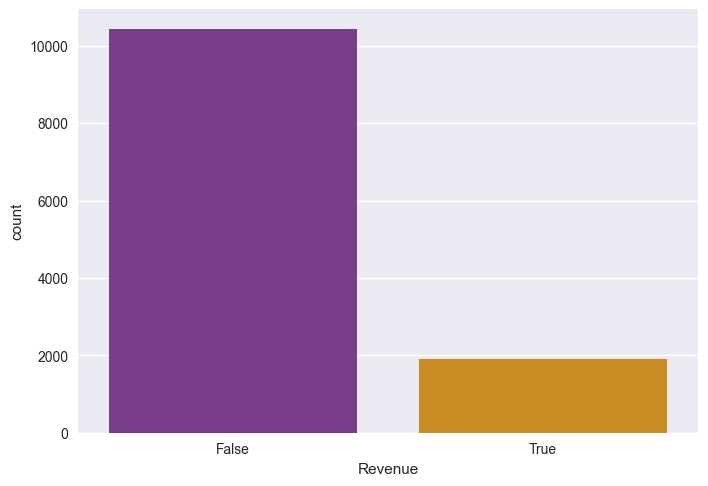

In [19]:
#Посмотрим на соотношение классов в данных
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase: {:.2f}'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}'.format(class_percent[1]))

Из 12 330 сессий покупкой товара завершаются лишь 15.47 %. Мы знаем, что такое соотношение классов заставляет нас смотреть на метрики для каждого из классов отдельно.

Условимся, что лучшей будет считаться та модель, у которой значение метрики F1 для пользователей, совершивших покупку, будет наибольшим.

In [20]:
#Разделим набор данных на матрицу наблюдений X и вектор ответов y
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

### Задание 6.2

Разделите выборку на тренировочную и тестовую в соотношении 80/20. Используйте разбиение, стратифицированное по целевому признаку. В качестве значения параметра random_state возьмите число 42.

Чему равно количество сессий на сайте в тренировочной и тестовой выборках?

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('Train size:', y_train.shape[0])
print('Test size:', y_test.shape[0])

Train size: 9864
Test size: 2466


### Задание 6.3

Создайте модель случайного леса. В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Оцените качество такой модели с помощью кросс-валидации по пяти фолдам. Так как классы несбалансированы, используйте кросс-валидатор StratifiedKFold (перемешивать выборку не нужно).

Для проведения кросс-валидации используйте функцию cross_validate(). Набор данных (параметры X, y) — тренировочная выборка (X_train, y_train). Метрика — -score.

Чему равно среднее значение метрики  на тренировочных и валидационных фолдах? Ответ округлите до двух знаков после точки-разделителя.

In [31]:
#Создадим модель
model_bad = ensemble.RandomForestClassifier(
    random_state=42
)
#Создадим объект кросс-валидации со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)

#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    #Модель
    estimator=model_bad,
    #Матрица наблюдений
    X=X_train,
    #Вектор ответов y
    y=y_train,
    #Кросс-валидатор
    cv=skf,
    #Метрика
    scoring='f1',
    #Подсчет метрики на тренировочных фолдах
    return_train_score=True
)

#Рассчитаем среднее значение
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Test k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Test k-fold mean f1: 0.65


### Задание 6.4

Модель является переобученной

### Задание 6.5

Попробуем использовать несколько вариаций случайного леса и с помощью кривых обучения постараемся выбрать наилучшую из них.

Создайте список из трёх следующих моделей:

Случайный лес из деревьев максимальной глубины 5.
Случайный лес из деревьев максимальной глубины 7.
Случайный лес из деревьев максимальной глубины 12.
Для всех трёх моделей количество деревьев в лесу (n_estimators) возьмите равным 200, количество объектов в листе (min_samples_leaf) — 5. Параметр random_state = 42. Остальные параметры оставьте по умолчанию.

Постройте для каждой из моделей кривую обучения.

In [33]:
#Создаем список из моделей
models = [
    ensemble.RandomForestClassifier(
        #Число деревьев
        n_estimators=200,
        #Максимальная глубина дерева
        max_depth=5,
        #Количество объектов в листе
        min_samples_leaf = 5,
        #Генератор случайных чисел
        random_state=42
    ),
    ensemble.RandomForestClassifier(
        #Число деревьев
        n_estimators=200,
        #Максимальная глубина дерева
        max_depth=7,
        #Количество объектов в листе
        min_samples_leaf = 5,
        #Генератор случайных чисел
        random_state=42
    ),
    ensemble.RandomForestClassifier(
        #Число деревьев
        n_estimators=200,
        #Максимальная глубина дерева
        max_depth=12,
        #Количество объектов в листе
        min_samples_leaf = 5,
        #Генератор случайных чисел
        random_state=42
    )
]

In [34]:
def plot_learning_curve(model, X, y, cv, scoring='f1', ax=None, title=''):
    #Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        #Модель
        estimator=model,
        #Матрица наблюдений X
        X=X,
        #Вектор ответов y
        y=y,
        #Кросс-валидатор
        cv=cv,
        #Метрика
        scoring=scoring
    )
    
    #Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    
    #Если координатной плоскости не было передано, создаем новую
    if ax is None:
        #Фигура + координатная плоскость
        fig, ax = plt.subplots(figsize = (10,4))
        
    #Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label='Train')
    #Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label='Valid')
    #Даем название графику и подписи осям
    ax.set_title('Learning curve: {}'.format(title))
    ax.set_xlabel('Train data size')
    ax.set_ylabel('Score')
    #Устанавливаем диапазон по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    #Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    #Отображаем легенду
    ax.legend();

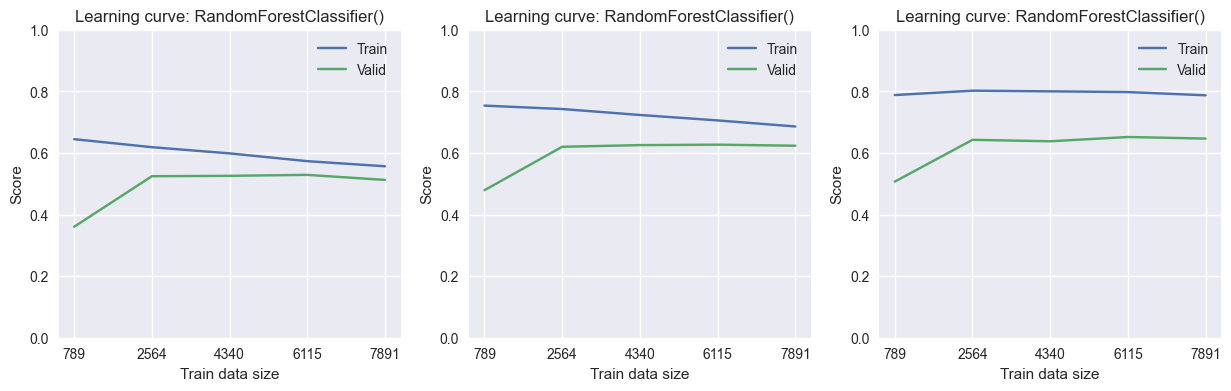

In [ ]:
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)

#Визуализируем кривые обучения
#Фигура + 3 координатных плоскости
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

#Создаем цикл по списку моделей и индексам этого списка
#i - текущий индекс, model - текущая модель 
for i, model in enumerate(models):
    plot_learning_curve(model, X_train, y_train, skf, ax=axes[i], title=model.__class__.__name__ +'()')

### Задание 6.6

Обучите случайный лес с выбранной в предыдущем задании оптимальной глубиной на тренировочной выборке. Сделайте предсказание меток классов и выведите отчёт о метриках классификации.

In [36]:
#Создаем оптимальную модель
model = ensemble.RandomForestClassifier(
        #Число деревьев
        n_estimators=200,
        #Максимальная глубина дерева
        max_depth=7,
        #Количество объектов в листе
        min_samples_leaf = 5,
        #Генератор случайных чисел
        random_state=42
)
#Обучаем модель
model.fit(X_train, y_train)
#Делаем предсказание на каждой из выборок
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Выводим значение метрик
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



### Задание 6.7

Попробуем повысить качество распознавания посетителей, совершивших покупку. Используем метод подбора порога вероятности с помощью PR-кривой.

Порог вероятности будем подбирать с помощью кросс-валидации.

Сделайте предсказание вероятностей принадлежности к пользователям, которые совершат покупку, на кросс-валидации на пяти фолдах. Используйте метод cross_val_predict().

Для кросс-валидации используйте случайный лес с подобранной в задании 6.5 оптимальной максимальной глубиной деревьев, набор данных (параметры X, y) — тренировочная выборка (X_train, y_train).

Постройте PR-кривую и отметьте на ней точку, в которой наблюдается максимум метрики  для посетителей, которые совершат покупку. Определите порог вероятности, соответствующий этой точке.

Thresholds: [0.0016146  0.00183509 0.00191163 0.00191452 0.00194508]
Precision scores: [0.15470397 0.15471966 0.15473535 0.15475104 0.15476673]
Recall scores: [1. 1. 1. 1. 1.]
Best threshold = 0.36, F1_Score = 0.69


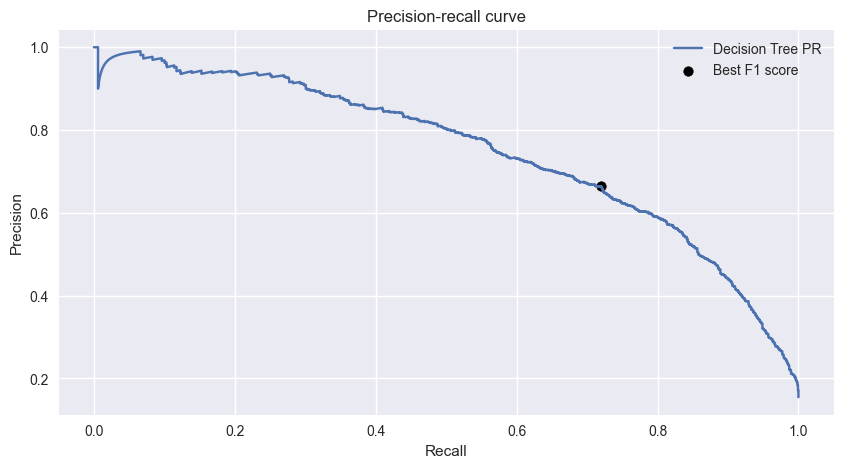

In [37]:
#Создаем оптимальную модель
model = ensemble.RandomForestClassifier(
        #Число деревьев
        n_estimators=200,
        #Максимальная глубина дерева
        max_depth=7,
        #Количество объектов в листе
        min_samples_leaf = 5,
        #Генератор случайных чисел
        random_state=42
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(
        model, X_train, y_train, cv=skf, method='predict_proba'
)
#Выделим столбец с вероятностью для класса True
y_cv_proba_pred = y_cv_proba_pred[:, 1]

#Вычислим координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:', recall[:5])

#Вычислим F1- меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1_Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую

#Фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10, 5))
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

### Задание 6.8

Сделайте предсказание классов объекта с определённым в предыдущем задании порогом вероятности. Выведите отчёт о метриках классификации.

In [38]:
#Задаем оптимальный порог вероятностей
thresholds_opt = 0.36

#Посетители, для которых вероятность покупки > threshold_opt,
#отностим к классу True, в противном случае - False
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_proba > thresholds_opt)

#Выводим значение метрик
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466

